In [1]:
"""
    tutorial: https://developers.google.com/earth-engine/ic_filtering?hl=vi
    http://patrickgray.me/open-geo-tutorial/chapter_7_earth_engine_oceanography.html"""

'\n    tutorial: https://developers.google.com/earth-engine/ic_filtering?hl=vi\n    http://patrickgray.me/open-geo-tutorial/chapter_7_earth_engine_oceanography.html'

In [2]:
import rasterio
import os
from rasterio.warp import reproject, Resampling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
"""
load extracted nighttime & population (current world pop) from local. 
Currently use same scale = 100. It literraly means 100km resolution as experimentation 
"""
path = 'data'
light = rasterio.open(f'{path}/NightTimeRasters_100.tif',mode='r') 
pop = rasterio.open(f'{path}/Nigeriapop2020.tif',mode='r') 

In [4]:
light.shape, pop.shape 

((10705, 13361), (10704, 13360))

In [5]:
"""To get the spatial coordinates of a pixel, use the dataset’s xy() method. 
The coordinates of the center of the image can be computed like this."""

light.xy(light.height // 2, light.width // 2),pop.xy(pop.height // 2, pop.width // 2)

((8.677276486952518, 9.077925103669825),
 (8.678030097101201, 9.077562713748335))

In [6]:
light.bounds , pop.bounds #bounds of the file

(BoundingBox(left=2.676081231392055, bottom=4.269692545420085, right=14.678471742512983, top=13.886157661919563),
 BoundingBox(left=2.6768348415570538, bottom=4.2702284707696485, right=14.678327037361232, top=13.885795272011146))

In [7]:
# reading one band
light_band = light.read(1)
pop_band = pop.read(1)

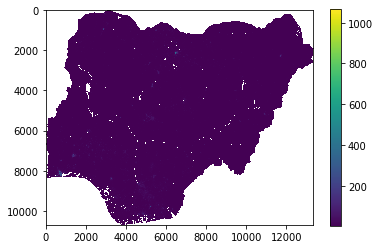

In [8]:
fig, ax = plt.subplots()
img = ax.imshow(pop_band)
fig.colorbar(img, ax=ax) 

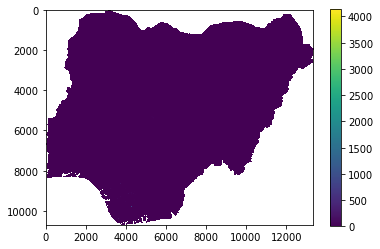

In [9]:
fig, ax = plt.subplots()
img = ax.imshow(light_band)
fig.colorbar(img, ax=ax) 

In [33]:
"""
aread without light
"""
light_band0 = np.argwhere(light_band == 0)
light_band0_df = pd.DataFrame(light_band0)
light_band0_df.columns = ['px','py']
# light_band0_df['pop'] = np.nan
# light_band0_df['coord'] = np.nan

In [34]:
"""
convert index to lat-lon & vice versa. Because pop & nighttime use the same resolution & crs
so we do not need to concern about mismatch
"""
def convert_pixel_to_coord(px, py):
    with rasterio.open(f'{path}/Nigeriapop2020.tif') as map_layer:
#         coords2pixels = map_layer.index(7.390621367187464,9.087241760397408) #input lon,lat
        pixels2coords = map_layer.xy(px, py)  #input px, py
    return pixels2coords

In [35]:
"""
extract population data with zero n=light pixel
"""
def from_pixel_to_pop(px,py):
    return pop_band[px,py]

In [37]:

light_band0_df['pop'] = light_band0_df.apply(lambda x: from_pixel_to_pop(x['px'],
                                                                         x['py']),
                                             axis=1)
light_band0_df['coord'] = light_band0_df.apply(lambda x: convert_pixel_to_coord(x['px'],
                                                                                x['py']),
                                                                                axis=1)

In [39]:
light_band0_df = light_band0_df.sort_values(by='pop',ascending=False)

In [41]:
light_band0_df.head()

,px,py,pop,coord
206,7367,8833,2.262072,"(10.612102903805274, 7.26745741624258)"
202,7366,8834,2.228951,"(10.61300121908939, 7.268355731526702)"
200,7366,8832,2.211460,"(10.611204588521156, 7.268355731526702)"
205,7367,8832,2.207390,"(10.611204588521156, 7.26745741624258)"
201,7366,8833,2.192685,"(10.612102903805274, 7.268355731526702)"
